<h2> <b> CONNECTING TANKS SYSTEM ANALYSIS </b> </h2>

<p style="font-calibri; color:black;"> In the <I>Chemical Process Control</I> course, I recently studied the concept of <u>"Connecting Tanks System"</u>. In the class, we were told to solve this analytically.It was a simple system but for complicated systems, it will get difficult to solve the ODEs analytically. At the same time, I was having a course on python and my first assignment was solving any ODE using python. I learnt the basic syntax and solved a general ODE just when it striked in my mind that I can solve the Connecting Tank system very easily with python. <big> <b> So, I tried this at 3 AM ! </b> </big> </p>


<img src="http://tool.uml.com.cn/ToolsEA/UserGuide/images/sysmlsim_example_twotanks_real.png" />


<b> What's the question </b>

There are two tanks <I>(Tank 1 and Tank 2)</I>. water comes from source and enters <I>Tank 1</I>, goes to <I>Tank 2</I> and then goes out from <I>Tank 2</I>. R1, R2 are resistances of the pipes. Let output flow be proportional to height of the water for both the tanks. We want to know how the system will respond on the step change in the input flow of water.
   

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Defining the function
def control(z,t,Fi):
    R1=1 #Resistance of outlet of tank 1
    R2=2 #Resistance of outlet of tank 2
    T1=5 #Tau for tank 1, A=5
    T2=10 #Tau for tank 2, A=5
    h1 = z[0] #deiation Level in tank 1 wrt time
    h2 = z[1] #deviation level in tank 2 wrt time
    dh1bydt = (-h1 + Fi*R1)/T1
    dh2bydt = (-h2 + h1*(R2/R1))/T2
    dzdt = [dh1bydt,dh2bydt]
    return dzdt

In [3]:
# initial condition at t=0
z0 = [0,0] #Because h1 & h2 are deviation variables

In [4]:
# time points
t = np.linspace(0,200,400)

In [5]:
# step change in input
Fi = np.zeros(400)
# change = 5.0
Fi[51:] = 5.0

In [6]:
# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]


In [7]:
# solve ODE
for i in range(1,400):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(control,z0,tspan,args=(Fi[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

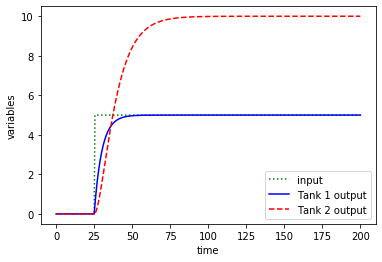

In [8]:
# plot results
plt.plot(t,Fi,'g:',label='input')
plt.plot(t,x,'b-',label='Tank 1 output')
plt.plot(t,y,'r--',label='Tank 2 output')
plt.ylabel('variables')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()